# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save as raw data
* Inspect the data and save under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - authentication token 

## Outputs

* Generate Dataset: outputs/datasets/collection/TelcoCustomerChurn.csv

## Additional Comments | Insights | Conclusions


* In the workplace **projects are not done using Kaggle data**, but instead the data comes from multiple data sources that may be hosted internally ( like in a data warehouse) or outside your company. For fir this project learning context, we are fetching the data from Kaggle.

* Another aspect is that in the workplace, the **data has never to be pushed to a public repository** due to security reasons. Just for this project learning context we are hosting the data in a public repo.


---

# Install and Import packages

* You eventually will need to restart runtime when installing packages, please note cell output when installing a package

In [ ]:
# this notebook doesn't need to install/update packages

* If you want to see which packages the session provides

In [ ]:
!pip freeze

---

# Fecth data from Kaggle

Install kaggle library

In [ ]:
! pip install kaggle==1.5.12

---

You first need to download to your machine a **json file (authentication token)** from Kaggle for authentication.


The process is:
  1. From the site header, click on your user profile picture, then on **“Account”** from the dropdown menu. This will take you to your account settings

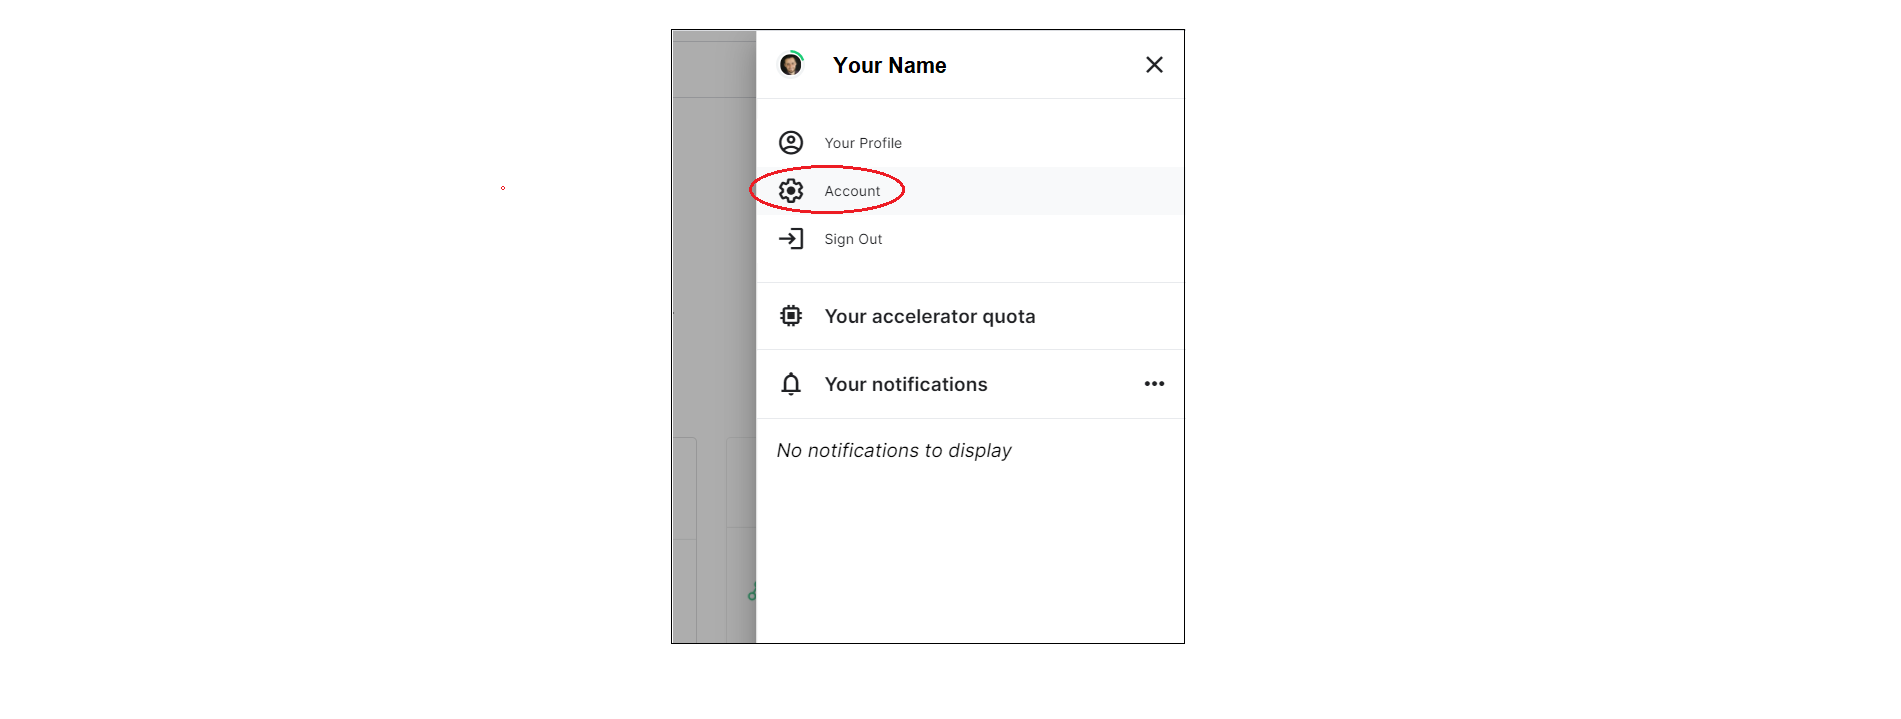

2. Scroll down to the section of the page called **API** 


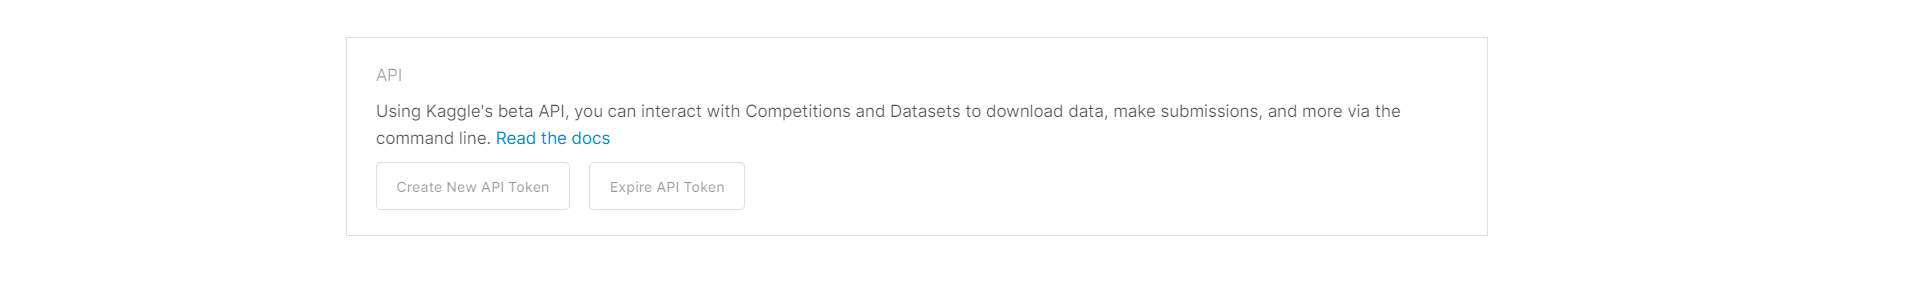

3. Click **Expire API Token** to remove previous tokens
4. To create a new token, click on the “**Create New API Token**” button. It will generate a fresh authentication token and will download **kaggle.json file** on your machine.

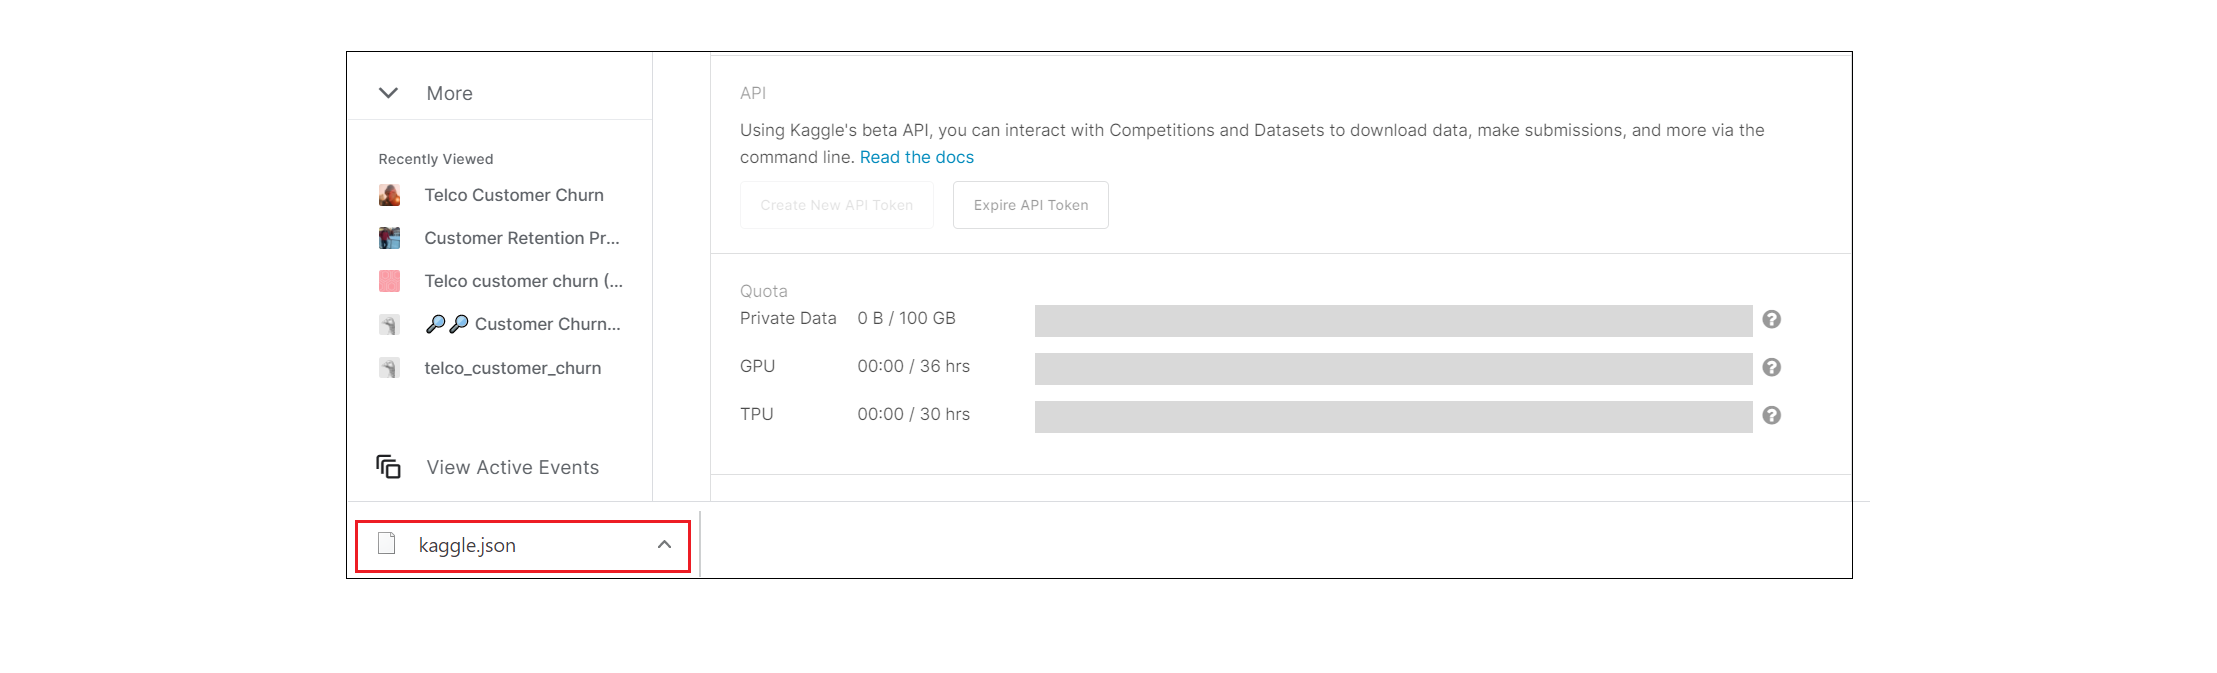

In case you find any difficulty, go to "Authentication" section in this [link](https://www.kaggle.com/docs/api).



* In the end, you should have this file saved locally in your machine. **Please make sure this file is named as kaggle.json**


---

You need to drag the json file to the project environment
* Follow the steps below

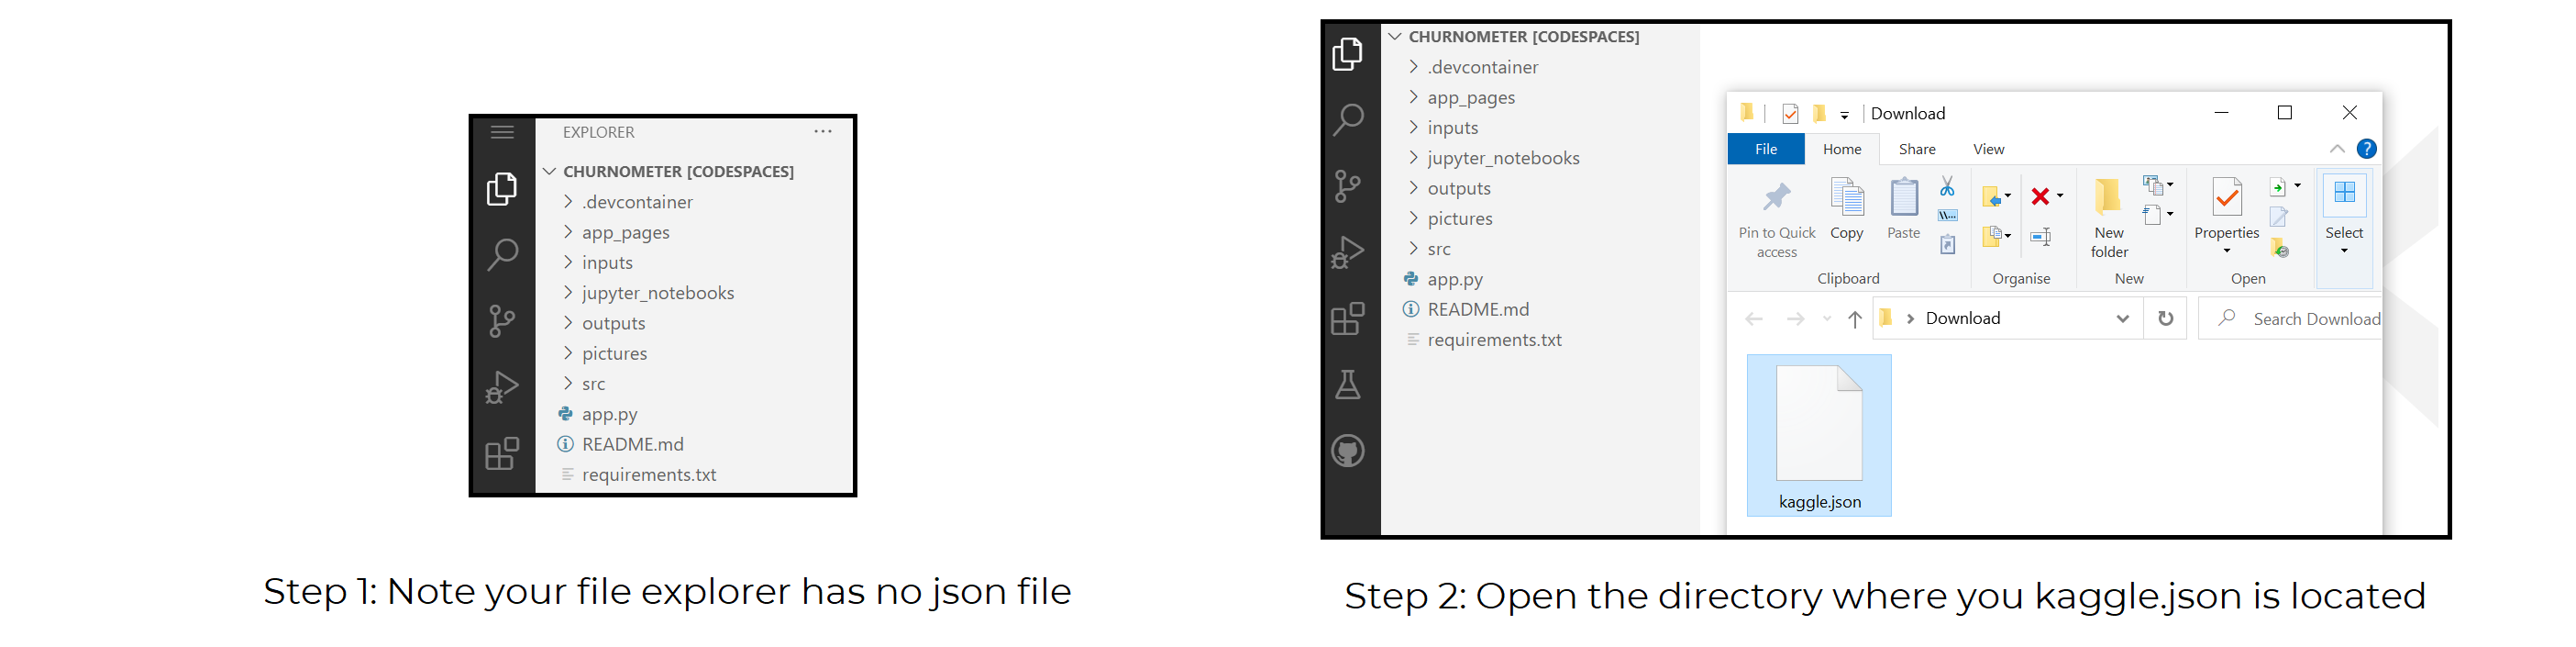

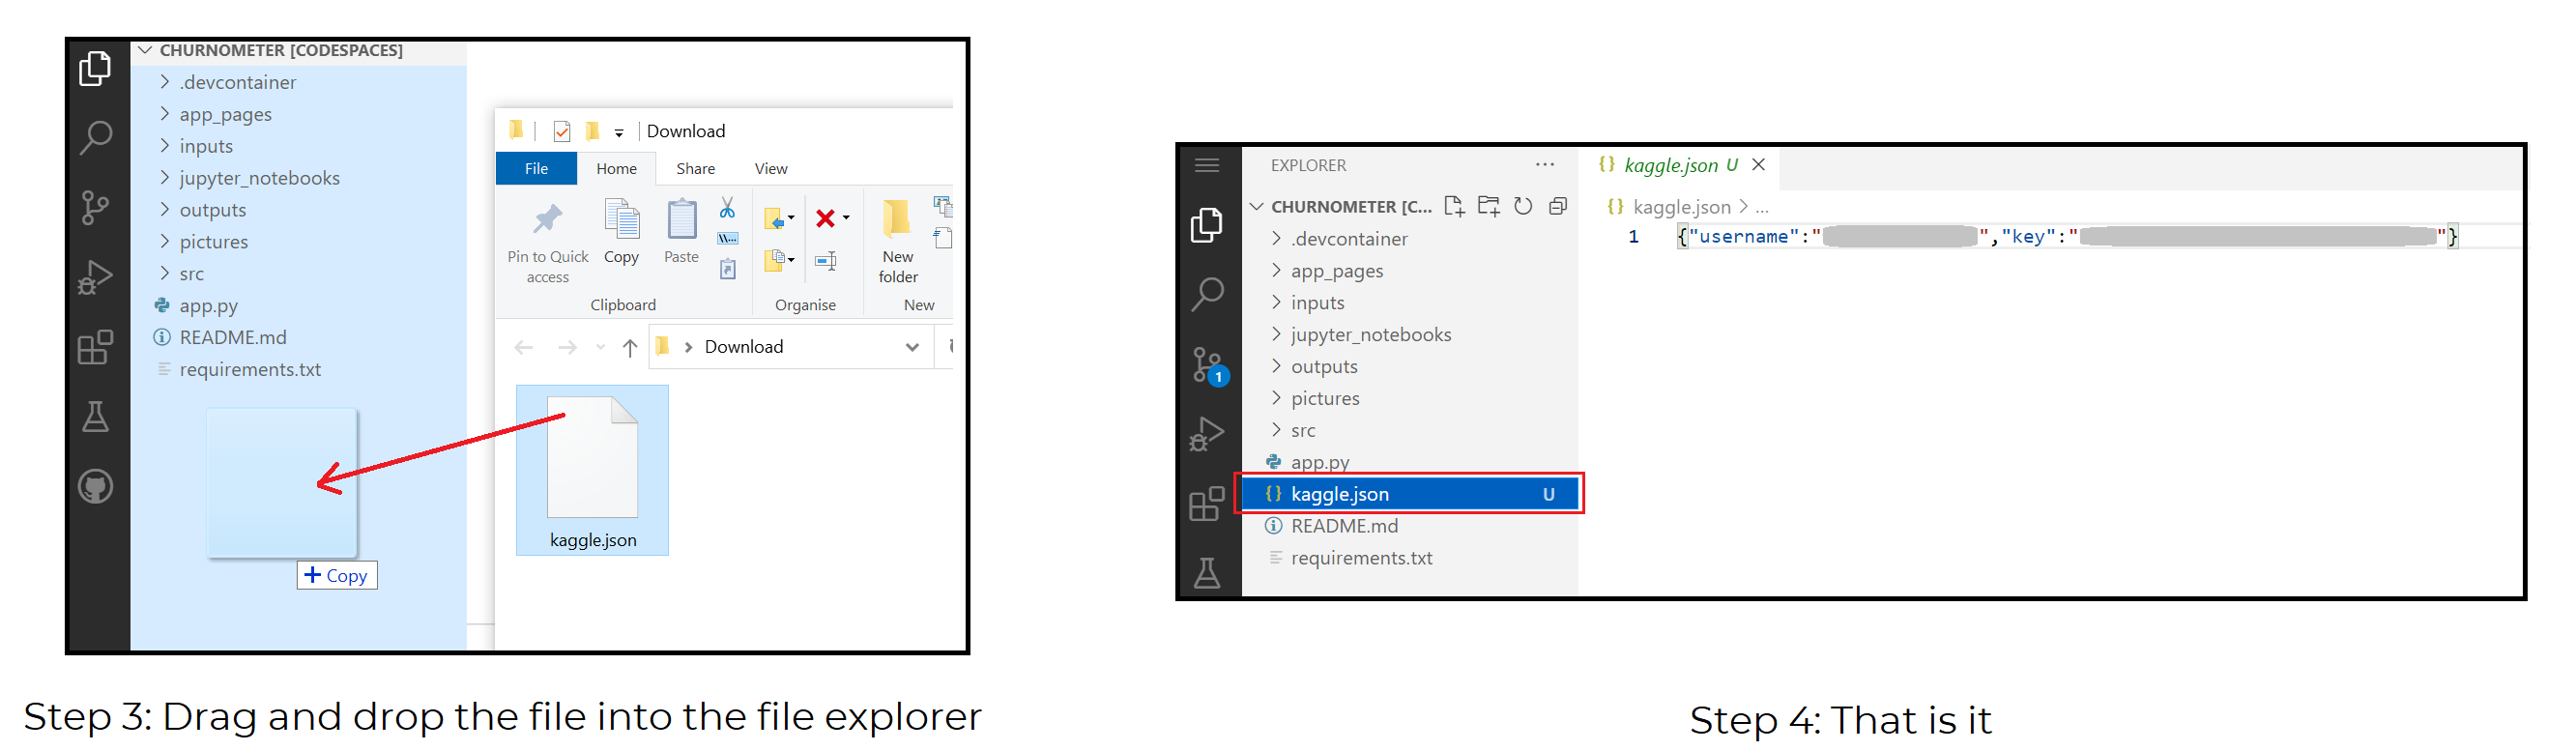

Once you do that run the cell below, so the token is recognized

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

Get the dataset path from the Kaggle url. When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ . You should copy that at KaggleDatasetPath.
* Set your destination folder.

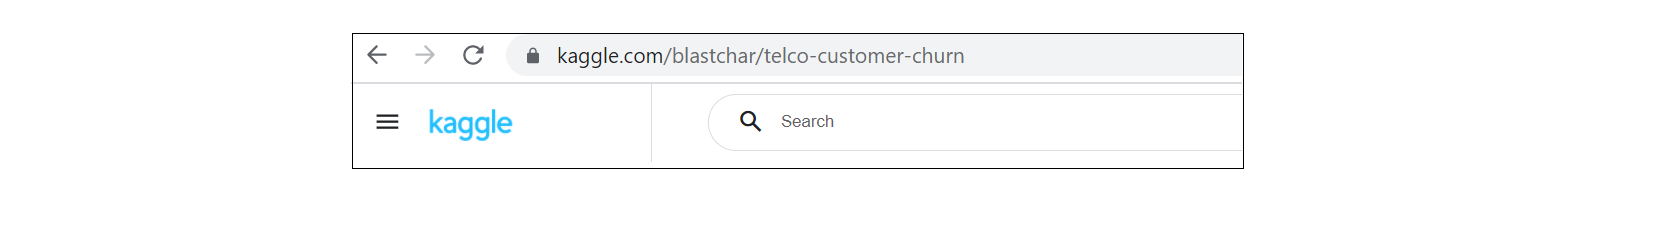

In [ ]:
KaggleDatasetPath = "blastchar/telco-customer-churn"
DestinationFolder = "inputs/datasets/raw"   
!kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip the downloaded file, delete the zip file and delete kaggle.json file

In [ ]:
!unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

---

# Load and Inspect Kaggle data

In [ ]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

DataFrame Summary

In [ ]:
df.info()

A very quick EDA to make sense for all variables content with `.unique()`
* This is just for getting more familiar with dataset content and start reflecting on the business objectives

In [ ]:
print("Unique values of each columns, including numerical and categorical:\n")
for col in df.columns: print(f"{col}:\n{df[col].unique()}\n")

We want to check if there is duplicated `customerID`: There isn't

In [ ]:
df[df.duplicated(subset=['customerID'])]

Converting `TotalCharges` to numeric

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] ,errors='coerce')

Check `TotalCharges` data type

In [ ]:
df['TotalCharges'].dtype

Check missing values after transformation
* You will notice there are missing values. We will handle that later

In [ ]:
df['TotalCharges'].isna().sum()

We noticed `Churn` is a categorical variable: Yes or No. We will replace/convert to integer

In [ ]:
df['Churn'] = df['Churn'].replace({"Yes":1, "No":0})

Check `Churn` data type

In [ ]:
df['Churn'].dtype

# Push files to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/TelcoCustomerChurn.csv",index=False)

### **Push** generated/new files from this Session to GitHub repo

Well done! You can now push the changes to your GitHub Repo, using the Git commands (git add, git commit, git push)

* Git status

In [ ]:
! git status

* Git commit

In [ ]:
CommitMsg = "add-files-data-collection"
! git add .
! git commit -m {CommitMsg}

* Git Push

In [ ]:
!git push origin main

* Then, save this notebook at your GitHub repo
* Terminate this session (Runtime - Manage Sessions - Terminate)